Euclidean Distance:-
    sqrt(Summation(i=1 to n) (qi - pi)^2)
    ex: 
    q = (1,3)
    p = (2,5)
    sqrt((1-2)^2+(3-5)^2)

In [1]:
import numpy as np
import pandas as pd
import warnings
import random
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import style
from sklearn import neighbors

style.use('fivethirtyeight')

In [2]:
#euc_dis = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)

In [3]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]


In [4]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warning.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            #euc_dis = np.sqrt(np.sum((np.array(features)-np.array(predict)))**2)
            euc_dis = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euc_dis,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result,confidence

('r', 1.0)


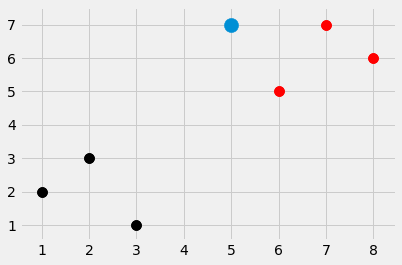

In [8]:
result = k_nearest_neighbors(dataset,new_features,k=3)
print(result)
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
plt.scatter(new_features[0],new_features[1],s = 200)        
plt.show()

In [6]:
accuracies=[]
for j in range(25):
    df=pd.read_csv('G:\\Vivek\\Datasets\\breastcancer_dataset\\data.txt')
    df.replace('?',-99999,inplace=True)
    df.drop(['id'],1,inplace=True)
    full_data = df.astype(float).values.tolist()

    random.shuffle(full_data)

    test_size= 0.2
    test_set = {2:[],4:[]}
    train_set = {2:[], 4:[]}

    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])
    correct = 0
    total = 0
    for group in test_set:
        for data in test_set[group]:
            vote,confidence = k_nearest_neighbors(train_set,data, k=5)
            if group == vote:
                correct+=1
           # else:
                #print(confidence)
            total+=1

    #print('Accuracy:', correct/total)  
    accuracies.append(correct/total)
print(sum(accuracies)/25)

0.9654676258992805
